<a href="https://colab.research.google.com/github/ferngonzalezp/deep_learning_lab/blob/main/2022/TP4/TP4_Introduction_to_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# TP4 - Introduction to Neural Networks

In this lab notebook we will start with Deep Learning, which is a subfield of Machine Learning centered around the concept of Neural Networks. Neural Networks are particularly powerful as universal approximators and nowadays are a cornerstone for many technological products such as image recognition systems, self-driving cars, drug desing, among others. The objectives of this lab are the following:
 * Gain an intuition of the different parts of a Neural Network and a Deep Learning pipeline. 
 * The important difference between Neural Networks and linear models.
 * An introduction to the use the Keras library for Deep Learning.
 * Solve a practical problem using Deep Learning.
 

## What is a Neural Network?

In 1943 Warren McCulloch, a neurophysiologist, and Walter Pitts, a logician, teamed up to develop a mathematical model of an artificial neuron. In their [paper](https://link.springer.com/article/10.1007/BF02478259) "A Logical Calculus of the Ideas Immanent in Nervous Activity" they declared that:


`Because of the “all-or-none” character of nervous activity, neural events and the relations among them can be treated by means of propositional logic. It is found that the behavior of every net can be described in these terms.`


McCulloch and Pitts realized that a simplified model of a real neuron could be represented using simple addition and thresholding, as shown here:

<img src="https://appliedgo.net/media/perceptron/neuron.png">

Rosenblatt further developed the artificial neuron to give it the ability to learn. Even more importantly, he worked on building the first device that actually used these principles, the Mark I Perceptron. In "The Design of an Intelligent Automaton" Rosenblatt wrote about this work: "We are now about to witness the birth of such a machine–-a machine capable of perceiving, recognizing and identifying its surroundings without any human training or control." The perceptron was built, and was able to successfully recognize simple shapes.

An MIT professor named Marvin Minsky (who was a grade behind Rosenblatt at the same high school!), along with Seymour Papert, wrote a book called Perceptrons (MIT Press), about Rosenblatt's invention. They showed that a single layer of these devices was unable to learn some simple but critical mathematical functions (such as XOR). In the same book, they also showed that using multiple layers of the devices would allow these limitations to be addressed. Unfortunately, only the first of these insights was widely recognized. As a result, the global academic community nearly entirely gave up on neural networks for the next two decades.

\\

<img src="https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Single-Perceptron.png.webp" width=550 height=350>

\\
So in theory by coupling many layers of perceptrons, one could achieve an universal function approximator, in theory. But at that time these networks were very slow due to hardware and algorithms limitations. It was not until the last decade that the use of Neural Networks has been gaining exponential interest thanks to the availability of data, hardware development and new algorithms that improved that training in parallel of these models.

So, the first and most basic neural network model that we will study is the Multi-layer perceptron architecture. And as the name implies, is just a bunch of perceptrons stacked together in many layers.

<img src="https://elogeel.files.wordpress.com/2010/05/051010_0921_multilayerp1.png?w=700">

Oh and by the way, it is useful now to introduce some of the Deep learning jargon employed by the community:


*   The functional form of the model is called its **architecture** (but be careful—sometimes people use model as a synonym of architecture, so this can get confusing).
*    The **weights** are called parameters.
*   The **predictions** are calculated from the independent variable, which is the **data** not including the labels.
*   The results of the model are called **predictions**.
*   The measure of performance is called the **loss**.
*    The **loss** depends not only on the predictions, but also the correct **labels** (also known as targets or the dependent variable); e.g., "dog" or "cat."

How does it look the process of learning or training a Neural Network?

 \\
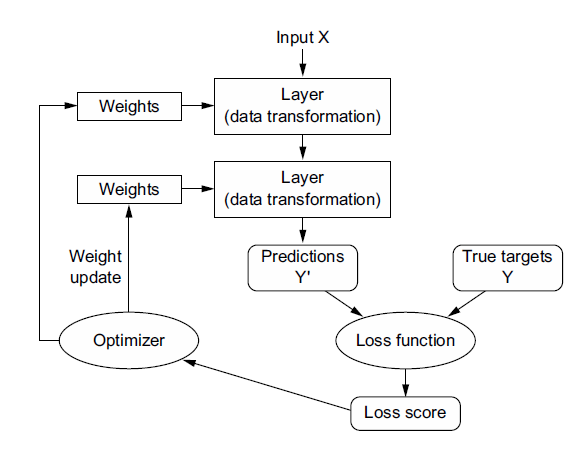

## Visualization of a Neural Network

In this [link](https://playground.tensorflow.org/) you will find an interactive visualization where you can modify parameters of a Neural Network and see how it affects the output and learning process.

## Introduction to Keras: Classification of MNIST handwritten digits



In this section we are introducing the Keras API for deep learning. We will tackle the problem of classification of the MNIST handwritten digits. This dataset ins composed from digits from 0 to 9 in black and white. This dataset is used commonly to tests models that classify images because is very simple and easy to train.

First, we import the dataset from the Tensorflow Dataset library.

In [ ]:
import tensorflow_datasets as tfds

Next, we download and prepare the dataset for training by using the method `tfds.load`, this function accepts several arguments which you can consult [here](https://www.tensorflow.org/datasets/api_docs/python/tfds/load). In this case we specify that we want the `mnist` dataset, the training part and we include the information about it. 

In [ ]:
mnist, info = tfds.load('mnist', split=['train', 'test'], with_info=True, as_supervised=True)

In [ ]:
fig = tfds.show_examples(mnist[0], info)

In [ ]:
print(info)

Now we will construct a Neural Network using Keras and train it to classify these digits.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

Within Keras we can construct models by calling the different layers and parts of it to built what is called a model graph. In this case we will make use of the functional API to construct our model. We will use a MLP to classify our digits, MLPs work with vector data representation meaning that our data has the form `[*, Number of features]`. Our data is an image so is represented as `[*, Width, Length, Feautures]` that in this case is `[28, 28, 1]` that translates in a image of 28 x 28 pixles and one color channel, we can perfectly reshape this as 1D data by converting it to a `[*, 784]` vector.

So coming back to the construction of our Neural Network, the first part of the model is the input layer, in Keras we do this by creating an `Input`.

In [ ]:
inputs = keras.Input(shape=(784,)) #The input is created with the method Input and by specyfing the expected shape 

Then, we can add layers to the model by calling a layer on this input object.

In [ ]:
dense = layers.Dense(64, activation="relu") #Notice that first is the number of neurons in this layer and then 
                                            #is the activation function we desire to use
x = dense(inputs)                           #Now we create a new variable x by calling this dense layer on input.

The "layer call" action is like drawing an arrow from "inputs" to this layer you created. You're "passing" the inputs to the dense layer, and you get x as the output.

Let's add a few more layers to the graph of layers:

In [ ]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

At this point, you can create a Model by specifying its inputs and outputs in the graph of layers:



In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

Let's check out what the model summary looks like:



In [ ]:
model.summary()


You can also plot the model as a graph:



In [ ]:
keras.utils.plot_model(model, "my_first_model.png")


And, optionally, display the input and output shapes of each layer in the plotted graph:



In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

This figure and the code are almost identical. In the code version, the connection arrows are replaced by the call operation.

A "graph of layers" is an intuitive mental image for a deep learning model, and the functional API is a way to create models that closely mirrors this.

Training, evaluation, and inference work exactly in the same way for models built using the functional API as for Sequential models.

The Model class offers a built-in training loop (the fit() method) and a built-in evaluation loop (the evaluate() method).

Here, load the MNIST image data, reshape it into vectors, fit the model on the data (while monitoring performance on a validation split), then evaluate the model on the test data:

In [ ]:
(x_train, y_train), (x_test, y_test) = tfds.as_numpy(tfds.load('mnist', split=['train', 'test'], 
                                                 as_supervised=True, batch_size=-1))

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_train, y_train, verbose=1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Let's look at some of the predictions of our model and how it performs:

In [ ]:
predictions = model.predict(x_test, batch_size=64)

In [ ]:
import matplotlib.pyplot as plt

idx = np.random.randint(1000, size=6)

fig = plt.figure(figsize=(10,8))
for i in range(len(idx)):
  plt.subplot(2,3,i+1)
  plt.imshow(x_test[idx[i]].reshape(28,28), cmap='Greys_r')
  plt.title(('prediction: '+str(np.argmax(predictions[idx[i]]))))

## Practice: Train a Neural Network for Material discovery

The Novel Materials Discovery (NOMAD) Center of Excellence (CoE) is a research lab dedicated to
advance computational materials science to enable systematic studies and predictions of novel
materials to solve urgent energy, environmental, and societal challenges. From the late 2017 to 2018
they launched a competition in Kaggle where the competitors proposed Machine Learning Solutions
to a problem related to discovery of new materials. The competition was based on a dataset of 3,000
$(Al_xGa_yIn_{1–x–y})_2O_3$ compounds where (𝑥 + 𝑦 + 𝑧 = 1), Its aim was to identify the best machine
learning (ML) model for the prediction of two key physical properties that are relevant for
optoelectronic applications: the electronic bandgap energy and the crystalline formation energy.
For the discovery of materials for a targeted application, it is required to explore a big amount of
compositional and configurational degrees of freedom. Density functional theory (DFT) is commonly
used but a vast amount of computational power is required for exploring a big configurational space
of alloys, for this reason machine learning (ML) promises to accelerate the discovery of new materials
by evaluating candidate compounds at lower computational cost than electronic structure approaches.

The competition is centered around the discovery of a transparent conductor because they are an
important class of compounds that are both electrically conductive and have a low absorption in the
visible range, which are typically competing properties. A combination of both of these characteristics
is key for the operation of a variety of technological devices such as photovoltaic cells, light-emitting
diodes for flat-panel displays, transistors, sensors, touch screens, and lasers. However, only a small
number of compounds are currently known to display both transparency and conductivity suitable
enough to be used as transparent conducting materials. Aluminum, gallium, indium sesquioxides are
some of the most promising transparent conductors because of a combination of both large bandgap
energies, which leads to optical transparency over the visible range, and high conductivities. These
materials are also chemically stable and relatively inexpensive to produce. Alloying of these binary
compounds in ternary or quaternary mixtures could enable the design of a new material at a specific
composition with improved properties over what is current possible.
The training set is 2400 compounds, while the test set is 600 compounds. For each line of the CSV file,
the corresponding spatial positions of all of the atoms in the unit cell expressed in Cartesian
coordinates are provided as a separate file in the subfolders train/ and test/.

he following information has been included for each compound in the training and test sets:
* Spacegroup label identifying the symmetry of the material
* Total number of Al, Ga, In and O atoms in the unit cell (Ntotal)
* Relative compositions of Al, Ga, and In (x, y, z)
* Lattice vectors and angles: lv1, lv2, lv3 which are lengths given in units of angstroms (i.e.,
$10^{−10}$ meters) and α, β, γ, which are angles in degrees between 0° and 360°.

The following cells are used to load the dataset.

In [ ]:
import pandas as pd

In [ ]:
INPUT_DIR = "./"
df_train = pd.read_csv(INPUT_DIR+"train.csv")
df_train["dataset"] = "train"
df_test = pd.read_csv(INPUT_DIR+"test.csv")
df_test["dataset"] = "test"
df_crystals = pd.concat([df_train, df_test], ignore_index=True)

test_true_csv = pd.read_csv(INPUT_DIR+"labeled_test.csv")
bandgap_test_true = test_true_csv["bandgap_energy_ev"]
formation_test_true = test_true_csv["formation_energy_ev_natom"]
formation_train_true = df_train["formation_energy_ev_natom"]
bandgap_train_true = df_train["bandgap_energy_ev"]

The solution used the smooth overlap of atomic positions
(SOAP) kernel developed by Bartók et al. that incorporates information on
the local atomic environment through a rotationally integrated overlap of
Gaussian densities of the neighboring atoms. The SOAP kernel
describes the local environment for a given atom through the sum of
Gaussians centered on each of the atomic neighbors within a specific
cutoff radius. The SOAP serves as a means of feature augmentation which is going to help in the learning process.

In [ ]:
from get_soap_descriptors import get_soap_datasets

In [ ]:
train_dataset_Eform, train_dataset_Egap, test_dataset_Eform, test_dataset_Egap = get_soap_datasets()

Build a Neural Network with three layers for predicting the bandgap energy and the formation energy. For predicting the bandgap energies and the
formation energies, the initial layer had 1024 and 512 neurons,
respectively. In both cases, the remaining two layers had 256 neurons
each. The hidden layers have the hyperbolic activation function, batch normaization and 20% dropout (see the documentation on [BatchNorm](https://keras.io/api/layers/normalization_layers/batch_normalization/) and [dropout](https://keras.io/api/layers/regularization_layers/dropout/)). The output layer will use the ReLU activation.

Note: put BatchNorm before the Dense layer and the Dropout after.

In [ ]:
#Name your models: 'model_gap_energy' and 'model_formation_energy'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert model_gap_energy.get_layer(index=-1).activation(1) == keras.activations.relu(1)
assert model_formation_energy.get_layer(index=-1).activation(1) == keras.activations.relu(1)

Now plot the model summary with the shapes included and save the image.

In [ ]:
keras.utils.plot_model(model_gap_energy, "model_gap_energy.png", show_shapes=True)

In [ ]:
keras.utils.plot_model(model_formation_energy, "model_formation_energy.png", show_shapes=True)

Compile the models, use the `Adam` optimizer, for training loss use the mean squared error, for metric use the Mean Squared Logarithmic Error.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
y_true = np.random.rand(10)
y_pred = np.random.rand(10)
assert model_gap_energy.loss(y_true,y_pred) == keras.losses.MeanSquaredError()(y_true,y_pred)
assert model_formation_energy.loss(y_true,y_pred) == keras.losses.MeanSquaredError()(y_true,y_pred)

Train the bandgap energy model for 250 epochs, with a batch size of 100 and 20% of the data used for validation.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Evaluate the model on test data

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print(results_gap_energy)

Train the formation energy model for 250 epochs, with a batch size of 100 and 20% of the data used for validation.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Evaluate the model on test data

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print(results_form_energy)

Now get the energy predictions using the tests datasets:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Create a new dataframe that contain the `'id','spacegroup','number_of_total_atoms','percent_atom_al',
                 'percent_atom_ga','percent_atom_in','bandgap_energy_ev','formation_energy_ev_natom', 'bandgap_energy_predicted', 'formation_energy_predicted'`, 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
df_results.head()

Find the material in the test set whose predicted bandgap is highest and formation energy is over 0.25 and bandagap energy over 3.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
print(material)

In [ ]:
assert material['formation_energy_predicted'].max() > 0.25
assert material['bandgap_energy_predicted'].max() > 3